In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [2]:
DATA_PATH = r"C:\Users\ammym\OneDrive\Desktop\CDC\train_data.csv"
df = pd.read_csv(DATA_PATH)

df = df.reset_index(drop=True)
print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (16209, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,9117000170,20150505T000000,268643,4,2.25,1810,9240,2.0,0,0,...,7,1810,0,1961,0,98055,47.4362,-122.187,1660,9240
1,6700390210,20140708T000000,245000,3,2.50,1600,2788,2.0,0,0,...,7,1600,0,1992,0,98031,47.4034,-122.187,1720,3605
2,7212660540,20150115T000000,200000,4,2.50,1720,8638,2.0,0,0,...,8,1720,0,1994,0,98003,47.2704,-122.313,1870,7455
3,8562780200,20150427T000000,352499,2,2.25,1240,705,2.0,0,0,...,7,1150,90,2009,0,98027,47.5321,-122.073,1240,750
4,7760400350,20141205T000000,232000,3,2.00,1280,13356,1.0,0,0,...,7,1280,0,1994,0,98042,47.3715,-122.074,1590,8071


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16209 non-null  int64  
 1   date           16209 non-null  object 
 2   price          16209 non-null  int64  
 3   bedrooms       16209 non-null  int64  
 4   bathrooms      16209 non-null  float64
 5   sqft_living    16209 non-null  int64  
 6   sqft_lot       16209 non-null  int64  
 7   floors         16209 non-null  float64
 8   waterfront     16209 non-null  int64  
 9   view           16209 non-null  int64  
 10  condition      16209 non-null  int64  
 11  grade          16209 non-null  int64  
 12  sqft_above     16209 non-null  int64  
 13  sqft_basement  16209 non-null  int64  
 14  yr_built       16209 non-null  int64  
 15  yr_renovated   16209 non-null  int64  
 16  zipcode        16209 non-null  int64  
 17  lat            16209 non-null  float64
 18  long  

In [4]:
df.isnull().sum().sort_values(ascending=False)


id               0
grade            0
sqft_living15    0
long             0
lat              0
zipcode          0
yr_renovated     0
yr_built         0
sqft_basement    0
sqft_above       0
condition        0
date             0
view             0
waterfront       0
floors           0
sqft_lot         0
sqft_living      0
bathrooms        0
bedrooms         0
price            0
sqft_lot15       0
dtype: int64

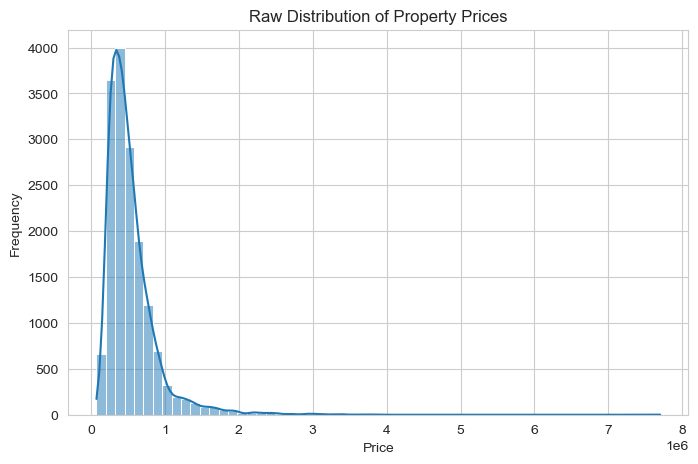

In [5]:
plt.figure(figsize=(8,5))
sns.histplot(df["price"], bins=60, kde=True)
plt.title("Raw Distribution of Property Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


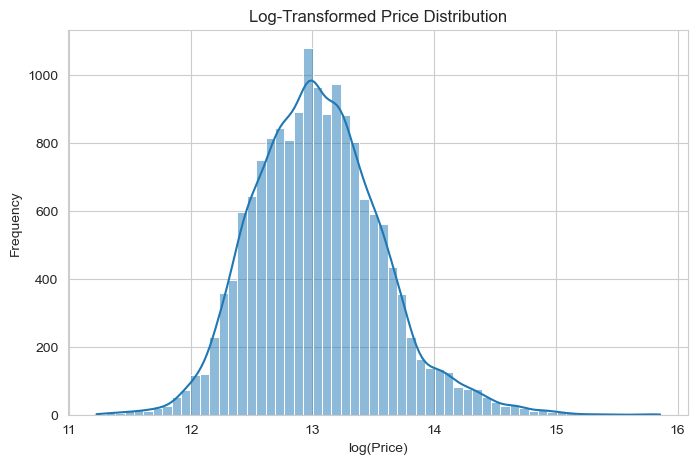

In [6]:
df["log_price"] = np.log1p(df["price"])

plt.figure(figsize=(8,5))
sns.histplot(df["log_price"], bins=60, kde=True)
plt.title("Log-Transformed Price Distribution")
plt.xlabel("log(Price)")
plt.ylabel("Frequency")
plt.show()


In [7]:
print("Total rows:", df.shape[0])
print("Unique property IDs:", df["id"].nunique())


Total rows: 16209
Unique property IDs: 16110


In [8]:
df["date"] = pd.to_datetime(df["date"])

df = (
    df.sort_values("date")
      .groupby("id", as_index=False)
      .tail(1)
      .reset_index(drop=True)
)

print("After deduplication:", df.shape)


After deduplication: (16110, 22)


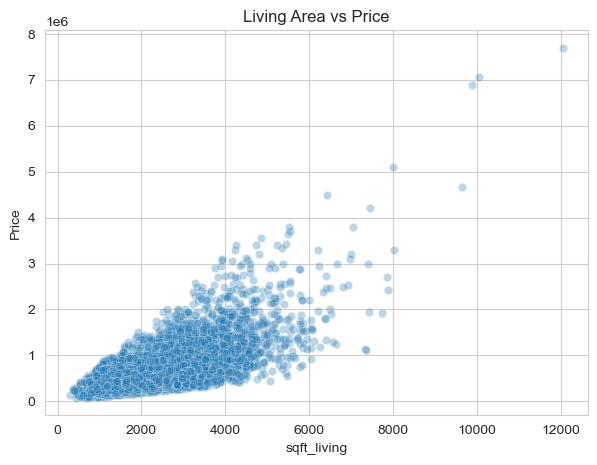

In [9]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x=df["sqft_living"],
    y=df["price"],
    alpha=0.3
)
plt.title("Living Area vs Price")
plt.xlabel("sqft_living")
plt.ylabel("Price")
plt.show()


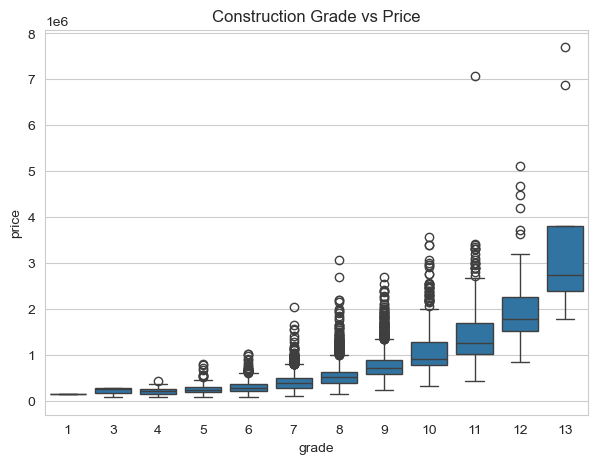

In [10]:
plt.figure(figsize=(7,5))
sns.boxplot(
    x=df["grade"],
    y=df["price"]
)
plt.title("Construction Grade vs Price")
plt.show()


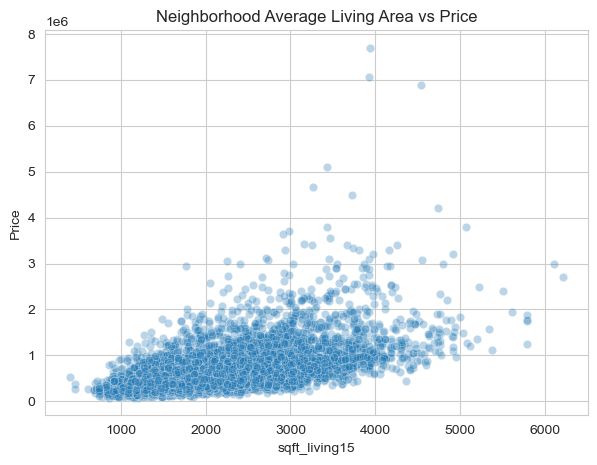

In [11]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x=df["sqft_living15"],
    y=df["price"],
    alpha=0.3
)
plt.title("Neighborhood Average Living Area vs Price")
plt.xlabel("sqft_living15")
plt.ylabel("Price")
plt.show()


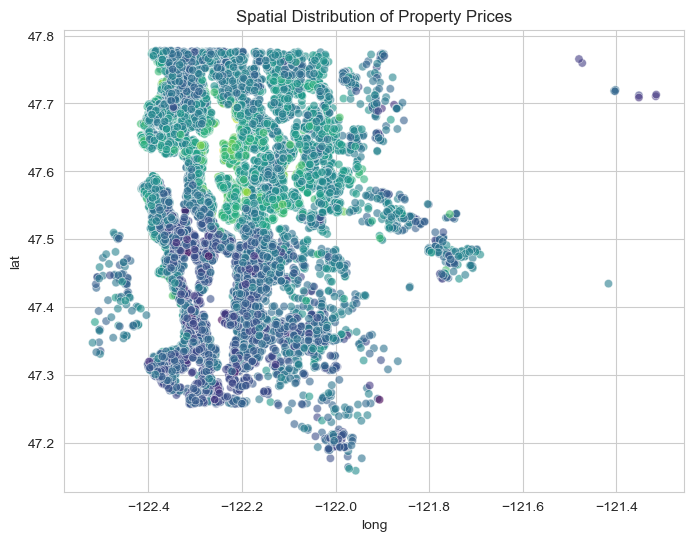

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df["long"],
    y=df["lat"],
    hue=df["log_price"],
    palette="viridis",
    alpha=0.6,
    legend=False
)
plt.title("Spatial Distribution of Property Prices")
plt.show()
